In [1]:
from utils.dataloader import Dataloader

dataloader = Dataloader(data_dir="data/")

data = dataloader.load_all()
comprehensive_data = data["comprehensive_data"]
covid19_testing_record = data["covid19_testing_record"]
covid19_variants_found = data["covid19_variants_found"]
vaccinations_by_country = data["vaccinations_by_country"]
vaccination_by_manufacturer = data["vaccination_by_manufacturer"]

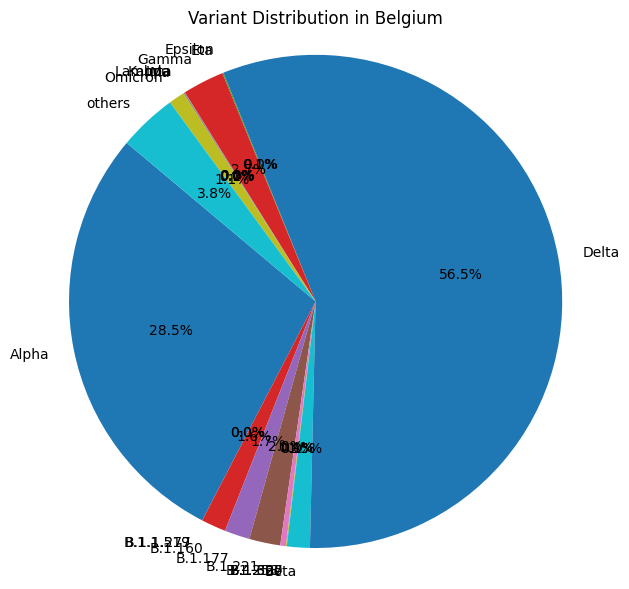

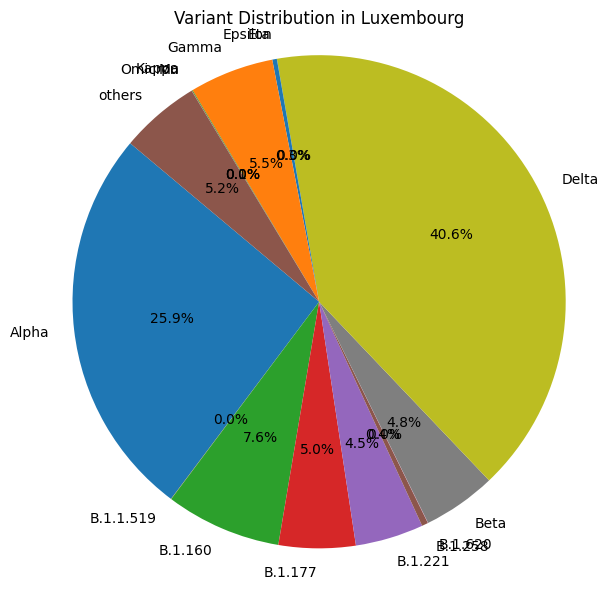

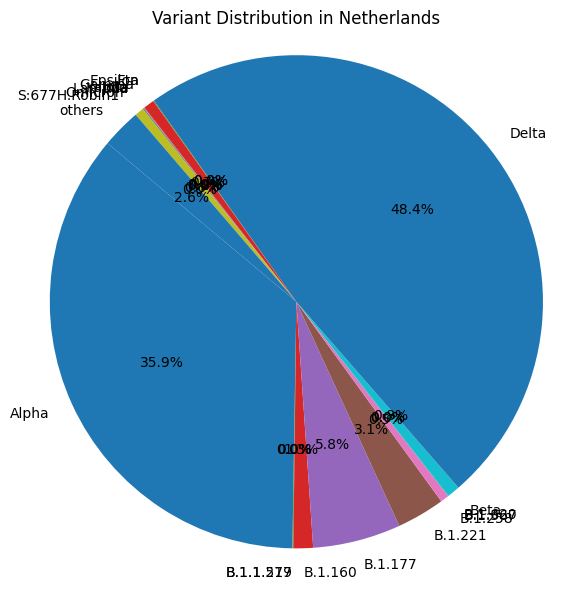

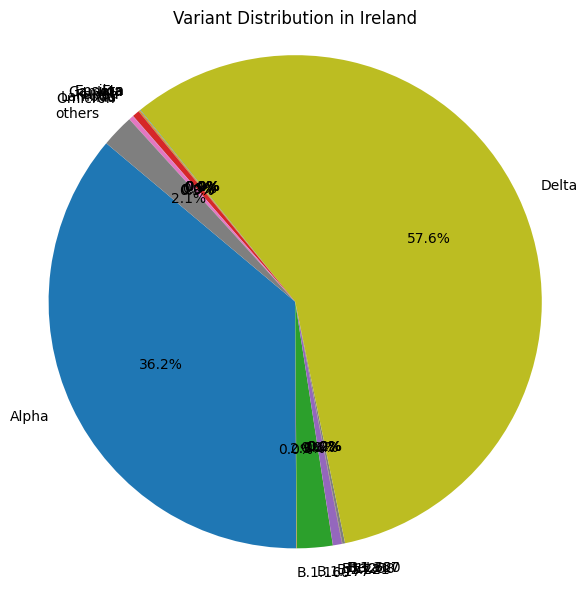

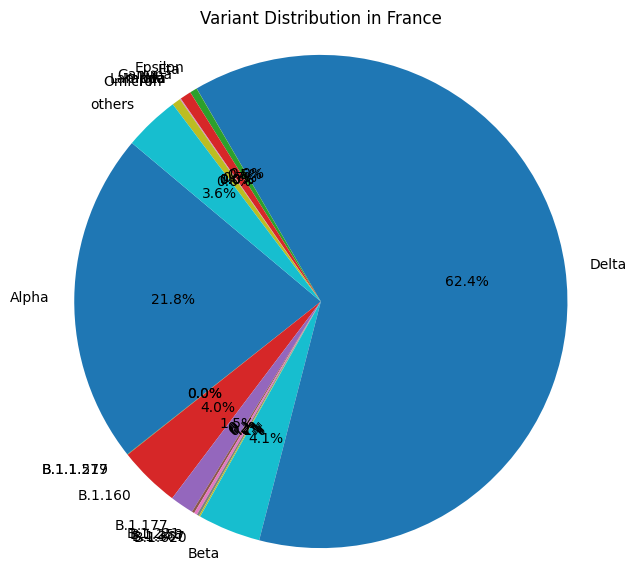

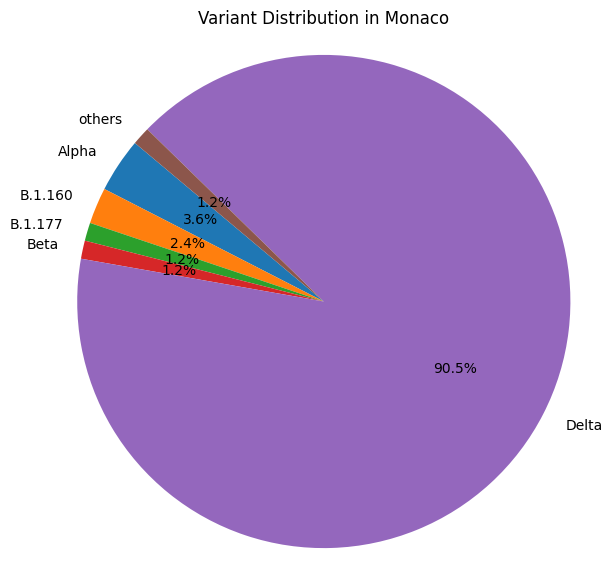

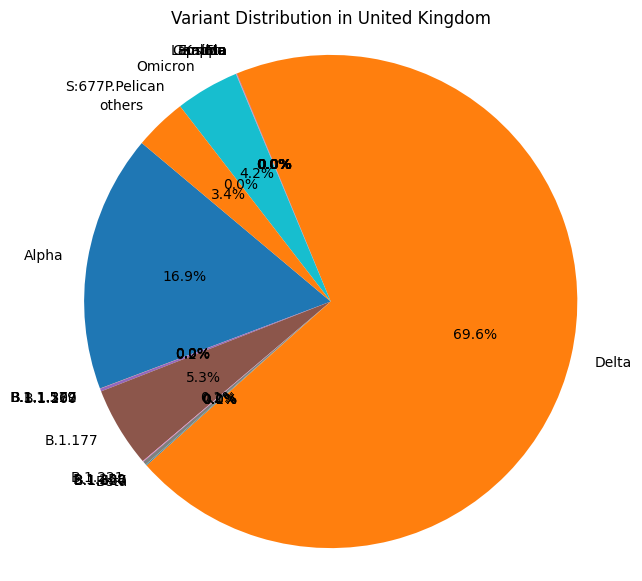

In [8]:
import matplotlib.pyplot as plt

countries = ["Belgium", "Luxembourg", "Netherlands", "Ireland", "France", "Monaco", "United Kingdom"]

for country in countries:
    df_country = covid19_variants_found[covid19_variants_found['country'] == country]
    variant_counts = df_country.groupby('variant')['number_of_sequences'].sum()
    variant_counts = variant_counts[(variant_counts > 0) & (variant_counts.index != 'non_who')]  # Remove variants with 0 sequences and non_who
    plt.figure(figsize=(7, 7))
    plt.pie(variant_counts, labels=variant_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Variant Distribution in {country}')
    plt.axis('equal')
    plt.show()

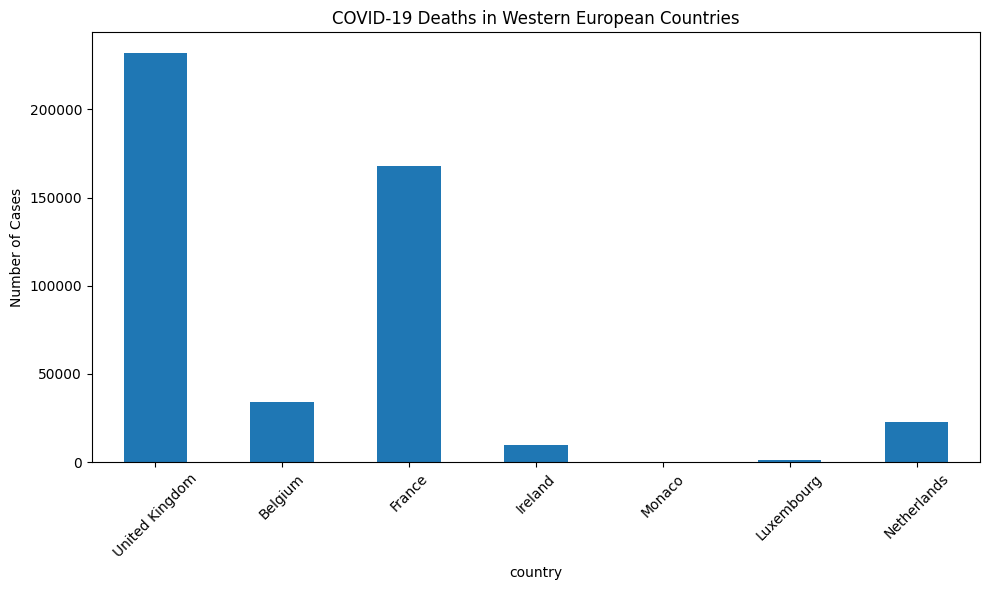

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
subset = comprehensive_data[comprehensive_data['country'].isin(countries)]
subset = subset.set_index('country')

subset['deaths_cases'].plot(kind='bar', ax=ax)
ax.set_ylabel('Number of Cases')
ax.set_title('COVID-19 Deaths in Western European Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate death to recovery ratio for each of the 7 countries
death_recovery = subset[['country', 'deaths_cases', 'recovered_cases']].copy()
death_recovery['death_to_recovery_ratio'] = death_recovery['deaths_cases'] / death_recovery['recovered_cases']
death_recovery['death_to_recovery_ratio_per_thousand'] = death_recovery['death_to_recovery_ratio'] * 1000 #deaths per thousand recoveries
death_recovery

,country,deaths_cases,recovered_cases,death_to_recovery_ratio,death_to_recovery_ratio_per_thousand
19,United Kingdom,232112.0,24692874.0,0.009400,9.399959
26,Belgium,34339.0,4827378.0,0.007113,7.113385
38,France,168091.0,38829399.0,0.004329,4.328962
62,Ireland,9604.0,1726464.0,0.005563,5.562815
64,Monaco,67.0,17114.0,0.003915,3.914923
83,Luxembourg,1000.0,390378.0,0.002562,2.561620
92,Netherlands,22986.0,8613215.0,0.002669,2.668690


---For report ???---
    We can use the total number of sequence for each coutry to assume as its prevalence. We can either say it is the most spreaded variants or maybe the variant that last the longest. 